In [99]:
import os
os.listdir()

['.ipynb_checkpoints',
 'airline-passengers.csv',
 'airline.ipynb',
 'deep concepts.txt',
 'forget layers.PNG',
 'series test.ipynb',
 'Untitled.ipynb']

In [100]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [101]:
data=pd.read_csv('airline-passengers.csv',parse_dates=["Month"])
data.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [102]:
timegap=[[(data["Month"][i]-data["Month"][0]).days] for i in range(1,data.shape[0])]

In [103]:
timegap.insert(0,[0])

In [104]:
new_data={"timegap":timegap,
         "Passengers":data["Passengers"],
        }

In [105]:
new_data=pd.DataFrame(new_data)

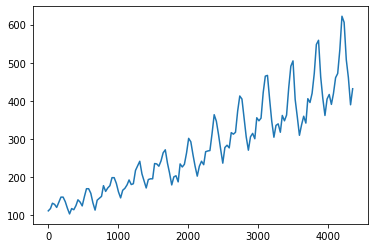

In [106]:
plt.plot(timegap,data["Passengers"])

In [117]:
model=Sequential()
model.add(LSTM((1),batch_input_shape=(None,None,1),return_sequences=False))

In [118]:
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])

In [119]:
model.summary(
)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [120]:
x_train,x_test,y_train,y_test=train_test_split(new_data["timegap"],new_data["Passengers"],test_size=0.4)

In [121]:
history=model.fit(x_train,y_train,epochs=200,validation_data=(x_test,y_test))

ValueError: Error when checking input: expected lstm_9_input to have 3 dimensions, but got array with shape (86, 1)